## Linear Regression Assignment
<i><b>Author: Anish Mahapatra</b></i>

<i>Machine Learning I > Module 2</i>

### Expected Outcome:

Build a multiple linear regression model to predict car prices.

### Problem Statement:

<b>Geely Auto</b>, a Chinese automobile company aspires to enter the US market and produce cars. They have hired an automobile consulting company (us) to understand the factors on which the pricing of a car depends on. pecifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:
- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car
    
### Business Goals:

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

### Data Preparation to keep in mind
- CarName is a concatenation of Car Company & Car Model
- Only Company name is to be considered as the variable for the purpose of model building

### Model Evaluation:
Post building the model and residual analysis, make sure to do *R-Squared analysis




In [2]:
#Importing the required modules and packages

import matplotlib.pyplot as plt
from numpy.random import randn
from numpy.random import seed
from numpy import percentile
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
import warnings

In [3]:
# Removing the minimum display columns to 500
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Ignoring warnings
warnings.filterwarnings("ignore")

In [3]:
# Importing the required csv from the folder:

carData = pd.read_csv('CarPrice_Assignment.csv')

In [4]:
# Sense check of the application data

carData.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### 1. Pre-Processing:
- Check the % of missing values
- Check the data types
- Outlier Analysis

### 2. EDA - to understand the data
- Univariate Analysis
- Make heatmap to understand correlation distribution
- Perform Bivariate Analysis



In [5]:
# Checking the top 5 rows and headers of the data
carData.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
# Looking at the type fo the data frame, data types and the number of rows
carData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [8]:
# Checking the number of rows and columns present in the data
carData.shape

(205, 26)

In [17]:
# Looking at the data types of the data
carData.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [10]:
# Making a copy of the application in dataframe df (checkpoint!) 
df = carData.copy(deep=False)

In [11]:
# Calculating the percent of missing values in the dataframe
percentMissing = (df.isnull().sum() / len(df)) * 100

# Making a dataframe with the missing values % and columns into a dataframe (on account of large number of rows) 
missingValuesDf = pd.DataFrame({'columnName': df.columns,
                                 'percentMissing': percentMissing})

In [14]:
# Viewing the dataframe to ensure that the values have been populated correctly
missingValuesDf

,columnName,percentMissing
car_ID,car_ID,0.0
symboling,symboling,0.0
CarName,CarName,0.0
fueltype,fueltype,0.0
aspiration,aspiration,0.0
doornumber,doornumber,0.0
carbody,carbody,0.0
drivewheel,drivewheel,0.0
enginelocation,enginelocation,0.0
wheelbase,wheelbase,0.0


So, we have been fortunate enough to get a clean dataset with no missing values. So there will be no more imputations or missing value treatment to be carried out.

### Outlier Treatment Analysis
Let us now analyze the numerical variables

<b>Note:</b> The Boxplots below have been plotted with the standard whiskers of 1.5 x (IQR)

In [20]:
# Selecting only the numeric columns to perform correlation analysis
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df.select_dtypes(include=numerics)

In [23]:
# Displaying the top 5 rows of only the numerical values
df_num.head()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


Here, we notice that symboling is a categorical variable.

In [24]:
# Removal of the categorical columns
symboling = df_num.pop('symboling')
car_ID = df_num.pop('car_ID')

We shall analyze the boxplots of the above variables to see if there are any untowardly behavior in the data.

Note: We notice that car_ID is an identifier variable and does not hold significance when it comes

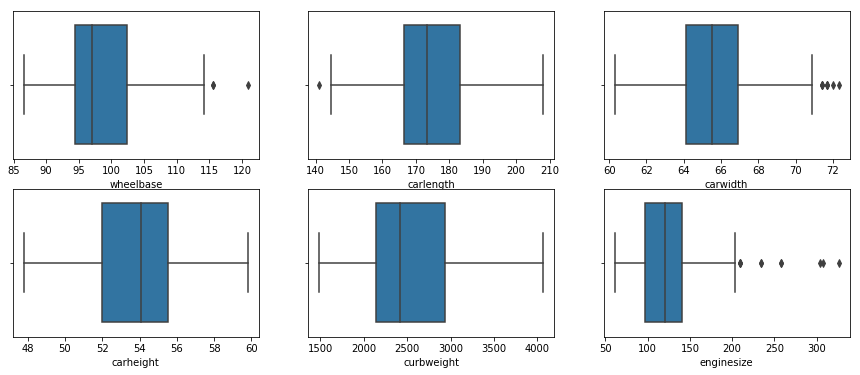

In [35]:
# Making boxplots as sub-plots to understand the trend of the data 
plt.figure(figsize=(15, 6))
plt.subplot(2,3,1)
sns.boxplot(x = 'wheelbase', data = df_num)
plt.subplot(2,3,2)
sns.boxplot(x = 'carlength', data = df_num)
plt.subplot(2,3,3)
sns.boxplot(x = 'carwidth', data = df_num)
plt.subplot(2,3,4)
sns.boxplot(x = 'carheight', data = df_num)
plt.subplot(2,3,5)
sns.boxplot(x = 'curbweight', data = df_num)
plt.subplot(2,3,6)
sns.boxplot(x = 'enginesize', data = df_num)
plt.show()

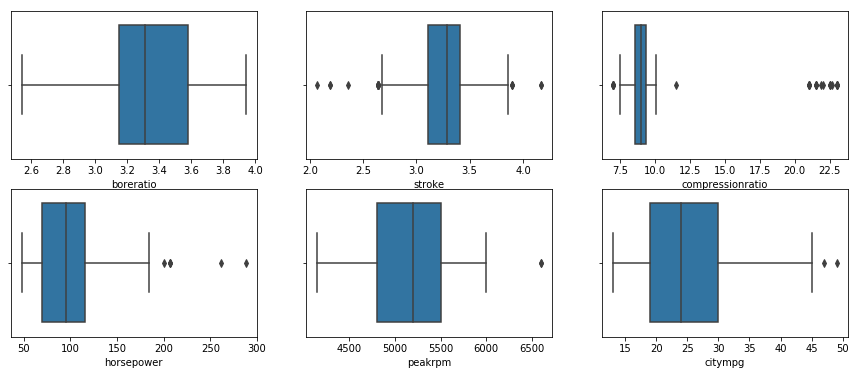

In [34]:
# Making boxplots as sub-plots to understand the trend of the data 

plt.figure(figsize=(15, 6))
plt.subplot(2,3,1)
sns.boxplot(x = 'boreratio', data = df_num)
plt.subplot(2,3,2)
sns.boxplot(x = 'stroke', data = df_num)
plt.subplot(2,3,3)
sns.boxplot(x = 'compressionratio', data = df_num)
plt.subplot(2,3,4)
sns.boxplot(x = 'horsepower', data = df_num)
plt.subplot(2,3,5)
sns.boxplot(x = 'peakrpm', data = df_num)
plt.subplot(2,3,6)
sns.boxplot(x = 'citympg', data = df_num)
plt.show()

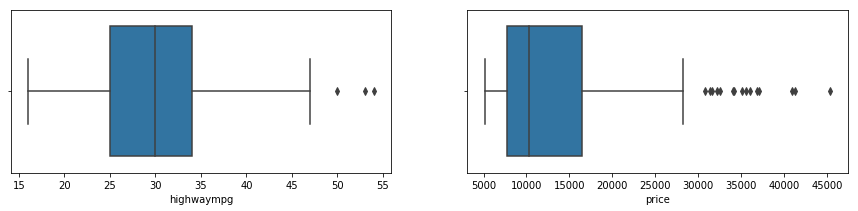

In [71]:
# Making boxplots as sub-plots to understand the trend of the data 
plt.figure(figsize=(15, 3))
plt.subplot(1,2,1)
sns.boxplot(x = 'highwaympg', data = df_num)
plt.subplot(1,2,2)
sns.boxplot(x = 'price', data = df_num)

Now that we have performed an outlier analysis on the numerical variables of the dataset, we can say that there are a few columns that we can deep drive into with the data:

- <b>citympg</b>: Mileage in the city
- <b>horsepower</b>: horse power
- <b>enginesize</b>: Size of the car
- <b>compressionratio</b>: compression ratio of the car
- <b>stroke</b>: stroke or volume inside the engine
- <b>price</b>: price of the car

### Distribution Analysis

Let us now understand the distribution of the numerical and categorical variables.

### Analysis of numerical variables
Let us now analyze the categorical variables

In [74]:
# Function to plot histogram for numerical, univariate analysis
def plotHistogram(df, colName):
    '''
    This function is used to set the style of the plot, name the graph and plot the distribution for the specified column
    
    Inputs:
    @df (dataframe) - The dataframe for which histograms are to be plotted
    @colName (string) - The numeric column for which histograms is to be plotted
    
    Output:
    Titles distribution plot of specified colName
    '''
    sns.set(style="whitegrid")
    plt.figure(figsize=(20,5)) 
    plt.title(colName)
    plt.ylabel('Density', fontsize=14)
    sns.distplot(df[colName], kde=True)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 144x1440 with 0 Axes>

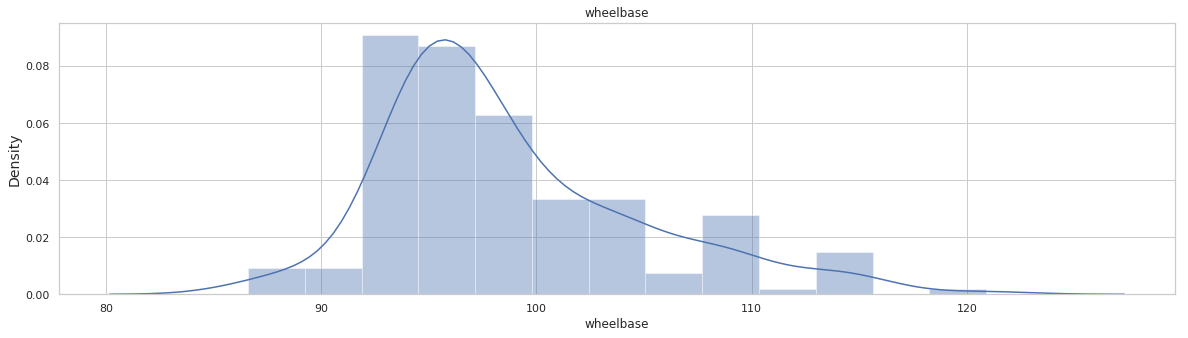

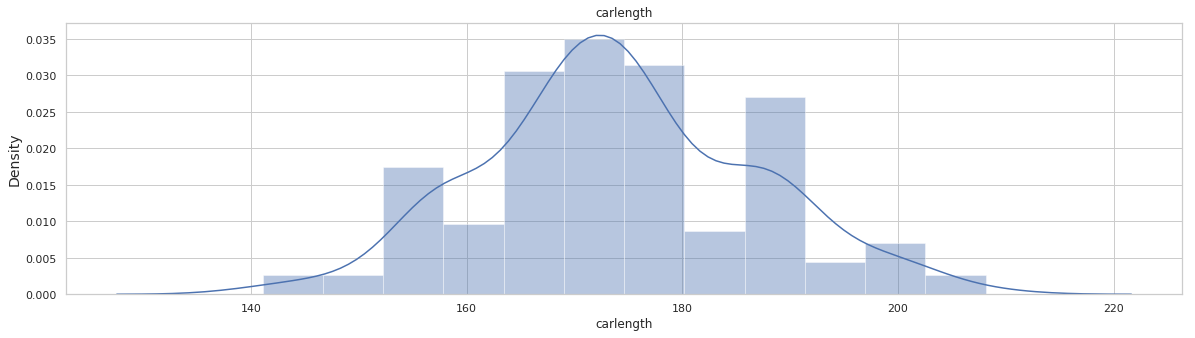

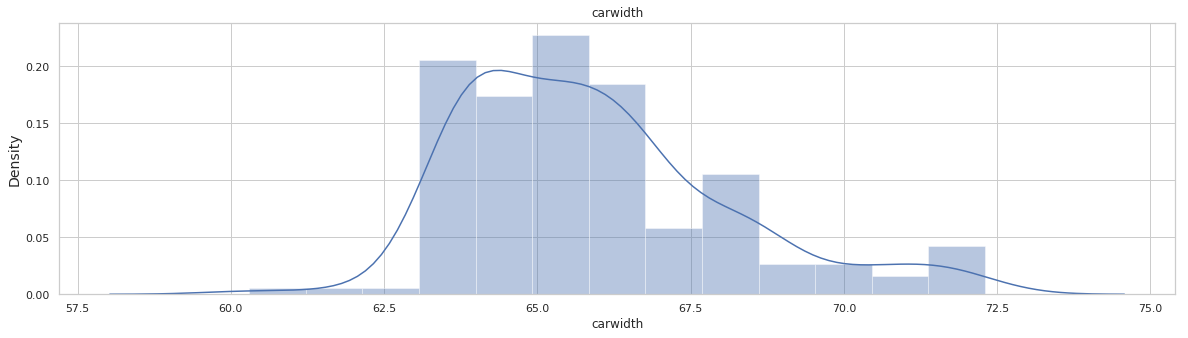

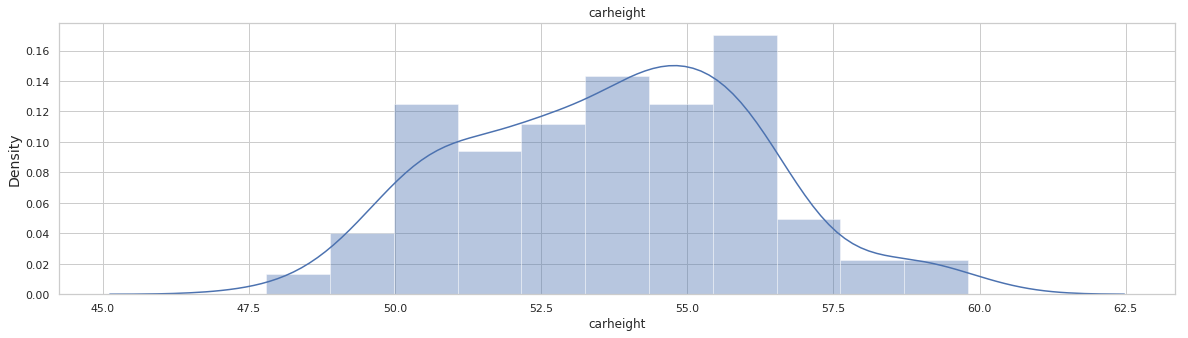

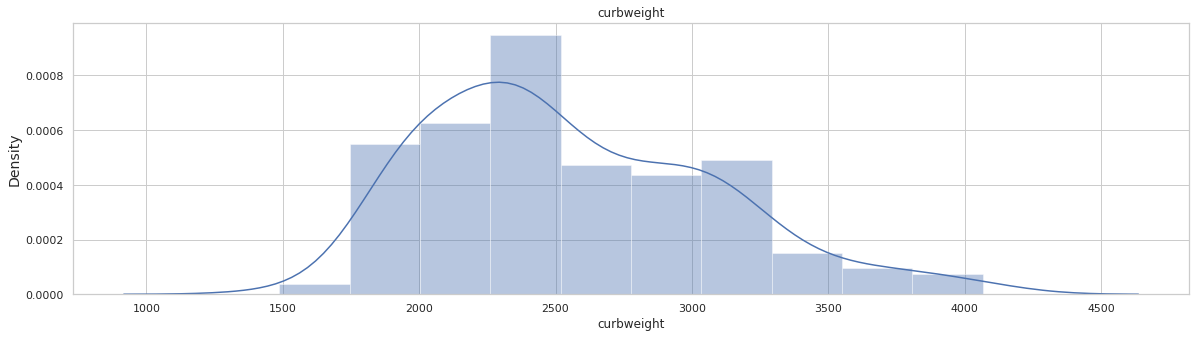

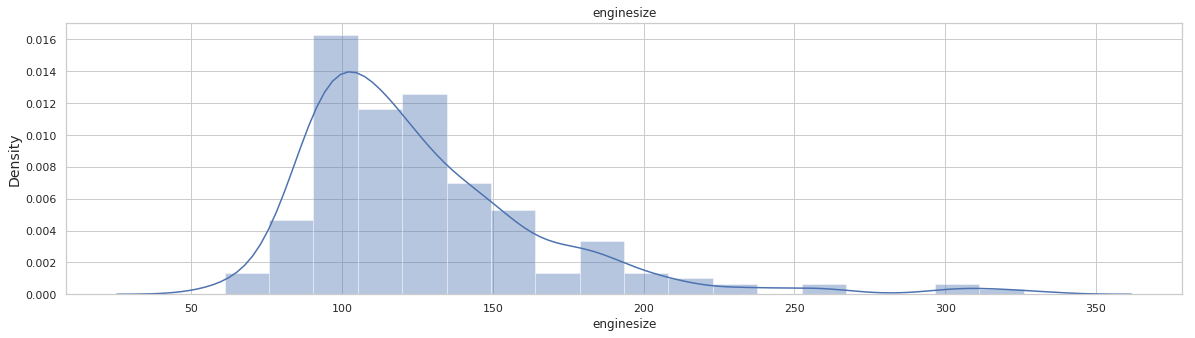

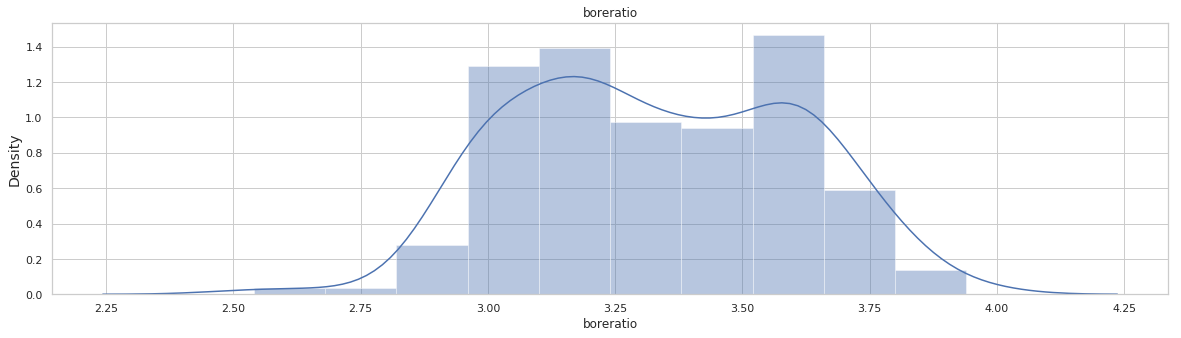

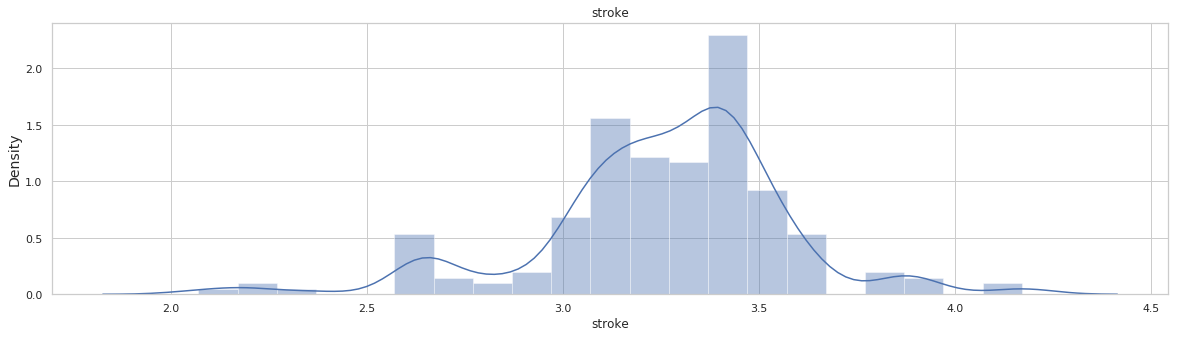

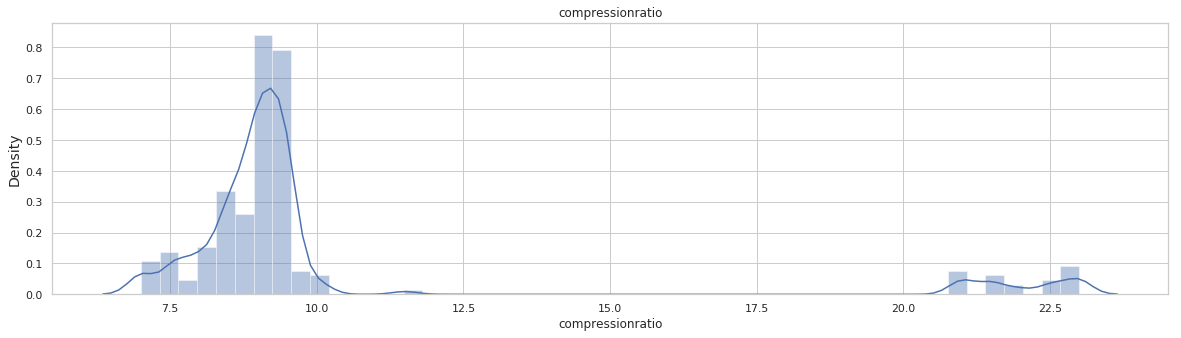

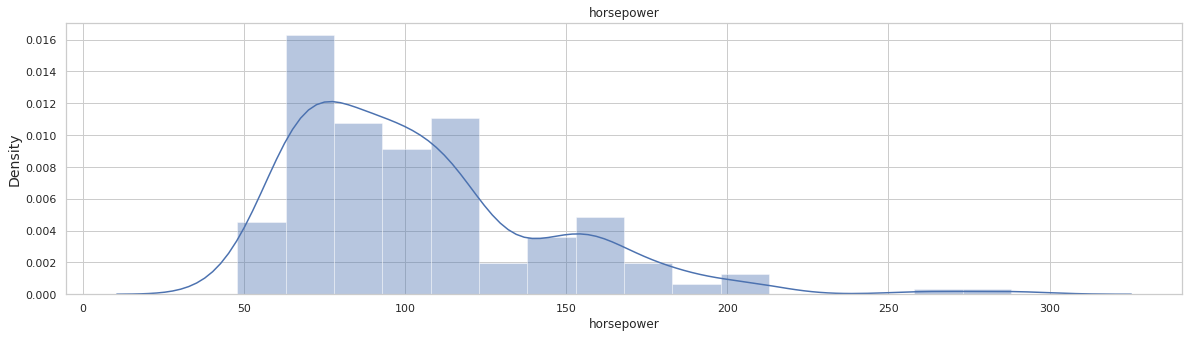

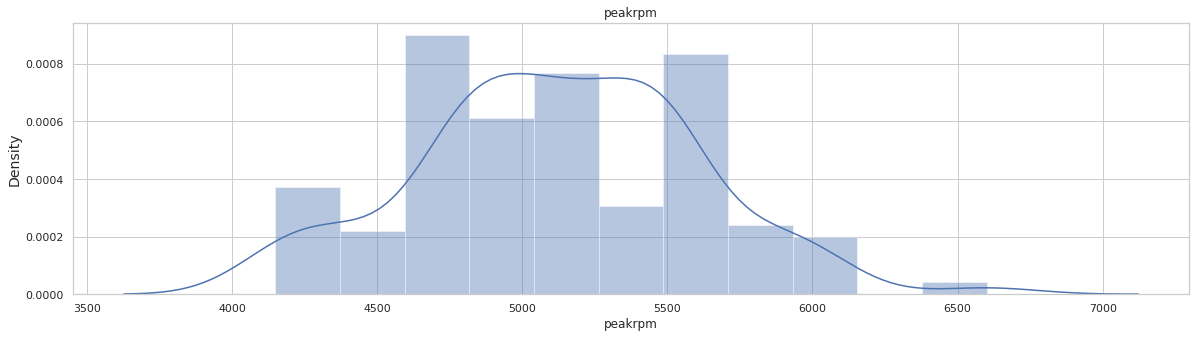

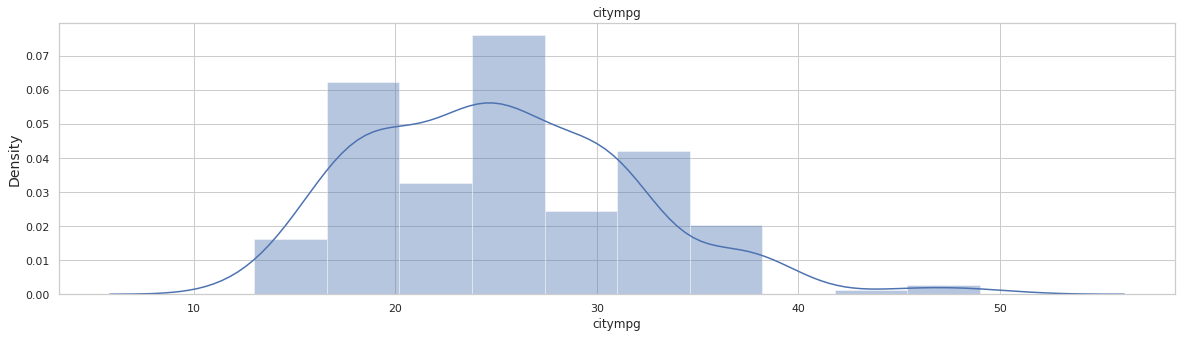

In [103]:
# Making boxplots as sub-plots to understand the trend of the data 
plt.figure(figsize=(2, 20))
plotHistogram(df_num, 'wheelbase')
plotHistogram(df_num, 'carlength')
plotHistogram(df_num, 'carwidth')
plotHistogram(df_num, 'carheight')
plotHistogram(df_num, 'curbweight')
plotHistogram(df_num, 'enginesize')
plotHistogram(df_num, 'boreratio')
plotHistogram(df_num, 'stroke')
plotHistogram(df_num, 'compressionratio')
plotHistogram(df_num, 'horsepower')
plotHistogram(df_num, 'peakrpm')
plotHistogram(df_num, 'citympg')
plt.show()


Here, we notice that most of the numerical variables follow a normal distribution with minimum skew.

The variables that does not follow a normal distribution:
- compression ratio

### Analysis of categorical variables
Let us now analyze the categorical variables

In [67]:
# Defining a function to view the distribution of the categorical variables
def plotFrequencyTable(df, catColName):
    '''
    This function is used to plot the frequency table of the specified categorical variable
    @df (dataframe) - Dataframe for which frequency table is to be plotted
    @catColName (string) - Column name for which frequency table is to be plotted
    '''
    sns.countplot(x=catColName, data=df)
    plt.title(catColName)
    plt.xticks(rotation = 90)
    plt.show();

In [45]:
## Subsetting data to subset categorical variables
df_cat = df.select_dtypes(include='object')

In [46]:
# Viewing the head of the data for a sense-check
df_cat.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


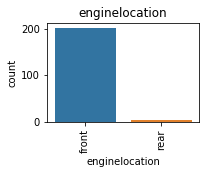

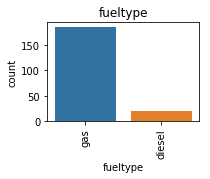

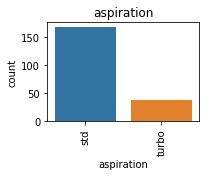

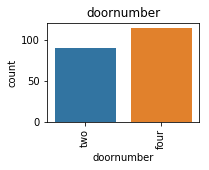

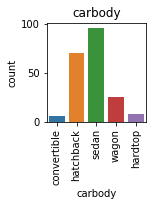

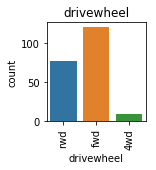

In [70]:
# Making boxplots as sub-plots to understand the trend of the data 

# plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
plotFrequencyTable(df,'enginelocation')
plt.subplot(2,2,2)
plotFrequencyTable(df_cat,'fueltype')
plt.subplot(2,2,3)
plotFrequencyTable(df_cat,'aspiration')
plt.subplot(2,2,4)
plotFrequencyTable(df_cat,'doornumber')
plt.subplot(2,3,5)
plotFrequencyTable(df_cat,'carbody')
plt.subplot(2,3,6)
plotFrequencyTable(df_cat,'drivewheel')
plt.show()

A couple of observations from the above graph would indicate the following:
- The engine is mostly located in the <b>front</b> of the car
- Most of the cars use <b>gas</b> as their fuel
- The aspiration employed by most vehicles is <b>std</b> (standard)
- Just over half the cars sold have <b>four</b> doors
- The most popular car body is <b>sedan</b>
- Most of the cars have a <b>fwd</b> drive wheel

## Bivariate Analysis

Now, we shall perform bi-variate analysis on the variables with respect to price (dependent variable) 

### Correlation Analysis

Let us now analyze from the perspective of correlation analysis as to what the most correlated variable are with the <b>price</b> (dependent variable)

Let us now proceed to plot the correlation matrix of the data:

In [88]:
# Plotting the correlation matrix of the data
cor = df_num.corr()

In [90]:
#Correlation with output variable
cor_target = abs(cor['price'])

In [102]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
round(relevant_features.sort_values(ascending = True), 2)

boreratio     0.55
wheelbase     0.58
carlength     0.68
citympg       0.69
highwaympg    0.70
carwidth      0.76
horsepower    0.81
curbweight    0.84
enginesize    0.87
price         1.00
Name: price, dtype: float64

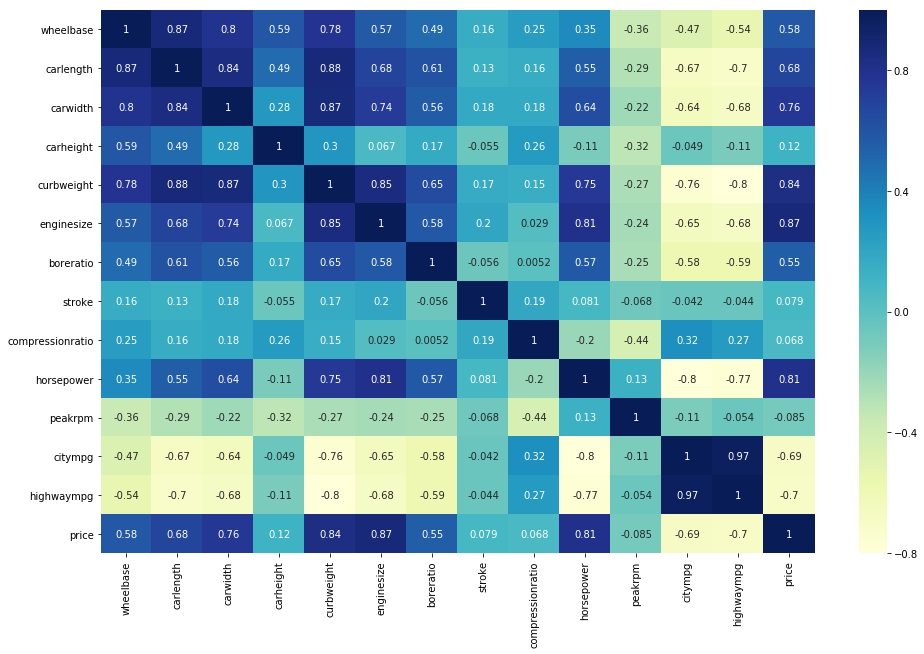

In [29]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_num.corr(), annot = True, cmap="YlGnBu")
plt.show()

Here, we notice that the top variables that are corrlated with price are as follows:
- enginesize    0.87
- curbweight    0.84
- horsepower    0.81
- carwidth      0.76
- highwaympg    0.70
- citympg       0.69
- carlength     0.68
- wheelbase     0.58
- boreratio     0.55


Pearson's correlation is considered significant when the variables generally have a correlation > 0.5.

Let us now try to do the business interpretation of the above variables as to why they may have a higher correlation as compared to the other variables:
- engine size:
- curb weight:
- horse power:
- car width:
- highway mpg:
- city mpg:
- car length:
- wheel base:
- bore ratio:

### Bivariate Plots

Now that we have found the variables that have the highest correlation with the dependent variable - price, we shall now plot the bivariate plots with price.

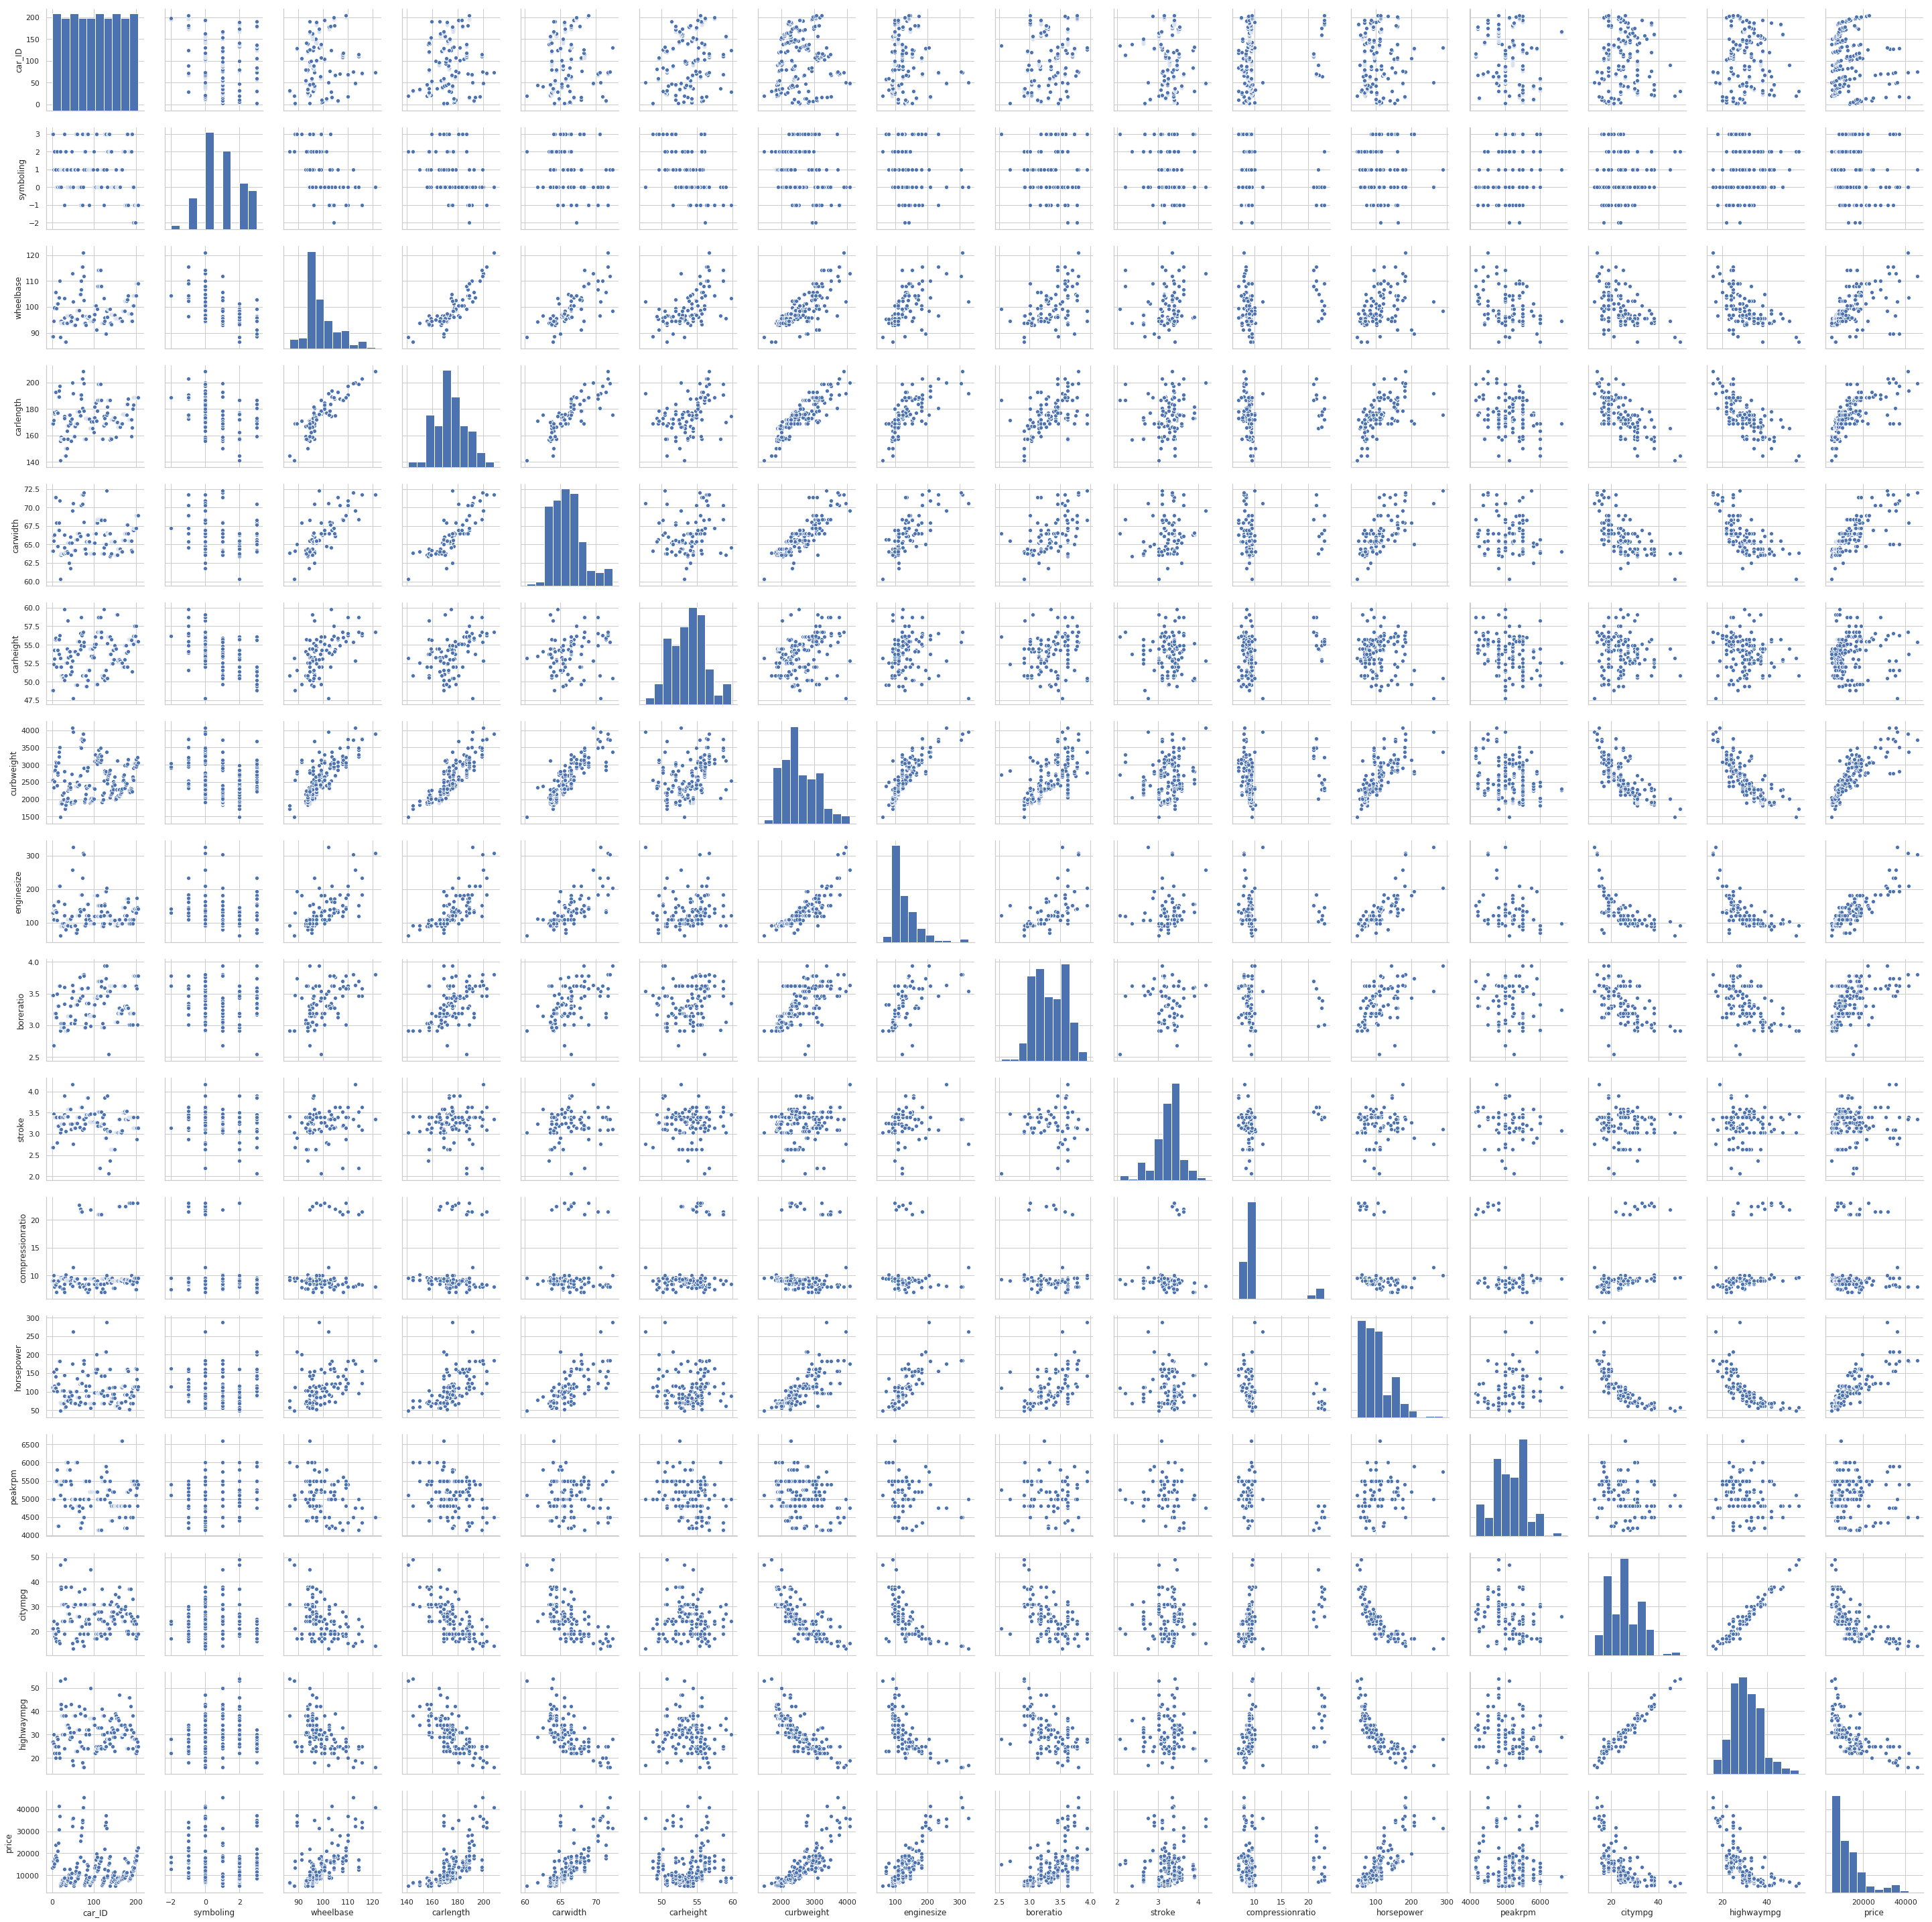

<Figure size 2880x2880 with 0 Axes>

In [117]:
sns.pairplot(df)
plt.figure(figsize=(40, 40))
plt.show()

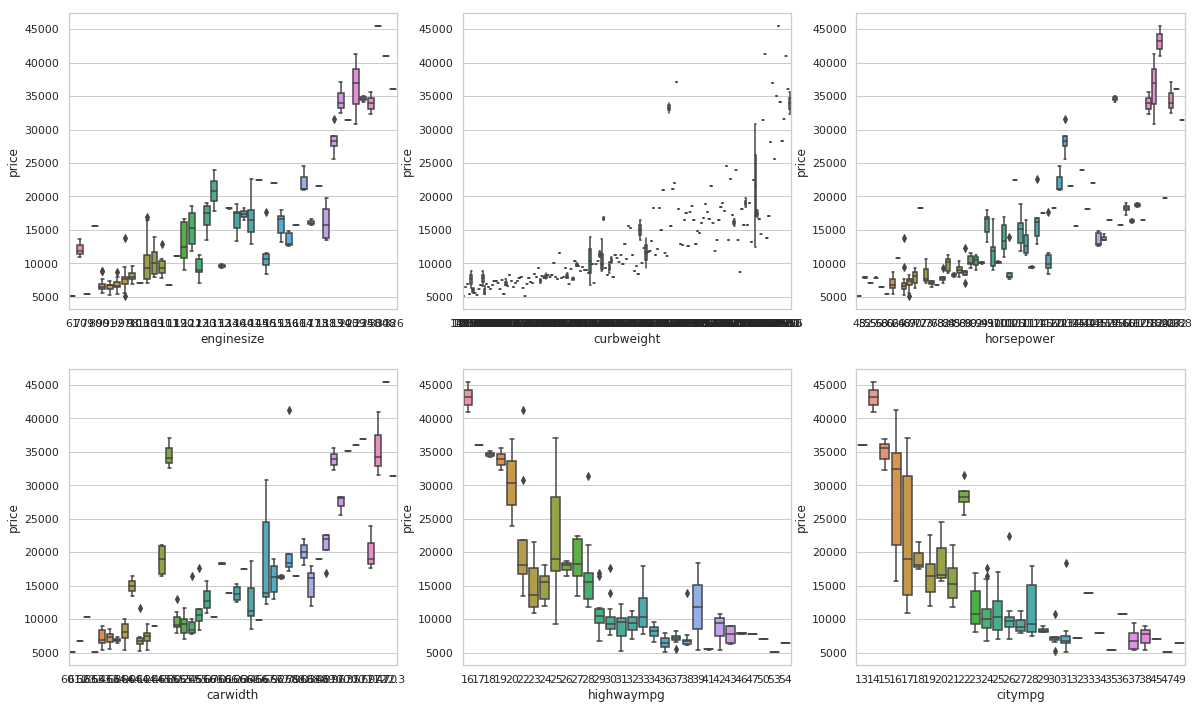

In [114]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'enginesize', y = 'price', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'curbweight', y = 'price', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'horsepower', y = 'price', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'carwidth', y = 'price', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'highwaympg', y = 'price', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'citympg', y = 'price', data = df)
plt.show()

The bivariate distribution can be analyzed. The following trends are observed from the correlated variables: 
- As engine size increases, price increases
- As curb weight increases, price increases
- As horse power increases, price increases
- As the car width increases, price increases

The following trends are interesting:
- As the highway mileage increases, the price decreases
- As the city mileage increases, the price decreases